## **1. Loading the Detection Model**

In [1]:
!pip install ultralytics
!git clone https://github.com/ultralytics/yolov5  # clone
!cd yolov5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.4/589.4 kB 9.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 17.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60
Cloning into 'yolov5'...
remote: Enumerating objects: 15705, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 15705 (delta 9), reused 23 (delta 6), pack-reused 15672
Receiving objects: 100% (15705/15705), 14.50 MiB | 27.91 MiB/s, done.
Resolving deltas: 100% (10754/10754), done.


In [3]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import os
import torchvision.transforms as transforms
images_base_path = '/kaggle/input/bank-notes/test_images'
labels_base_path = 'yolov5/runs/detect/exp/labels'

In [5]:
!python yolov5/detect.py --weights /kaggle/input/bank-notes-models/detection_model_yolov5_250.pt --source /kaggle/input/bank-notes/test_images --img 640 --save-txt --save-crop

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
detect: weights=['/kaggle/input/bank-notes-models/detection_model_yolov5_250.pt'], source=/kaggle/input/bank-notes/test_images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 322 layers, 86173414 parameters, 0 gradients
image 1/16 /kaggle/input/bank-notes/test_images/202304

In [ ]:
model = torch.jit.load('/kaggle/input/bank-notes-models/best_model_efnet0.pt')
model.eval()

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [21]:
def classify_image(image):
    with torch.no_grad():
        image = transform(image).unsqueeze(0).to(device)
        output = model(image)
        _, predicted = torch.max(output.data, 1)
        return predicted.item()

In [38]:
import os
detection_results = []
with open(os.path.join(labels_base_path, r'20230407_181829.txt'), 'r') as f:
    for line in f:
        detection_results.append(list(map(float, line.strip().split())))
print(len(detection_results))

6


In [39]:
import cv2
image_files = [r'/kaggle/input/bank-notes/test_images/20230407_181829.jpg'] 
images = [cv2.imread(image_file) for image_file in image_files]

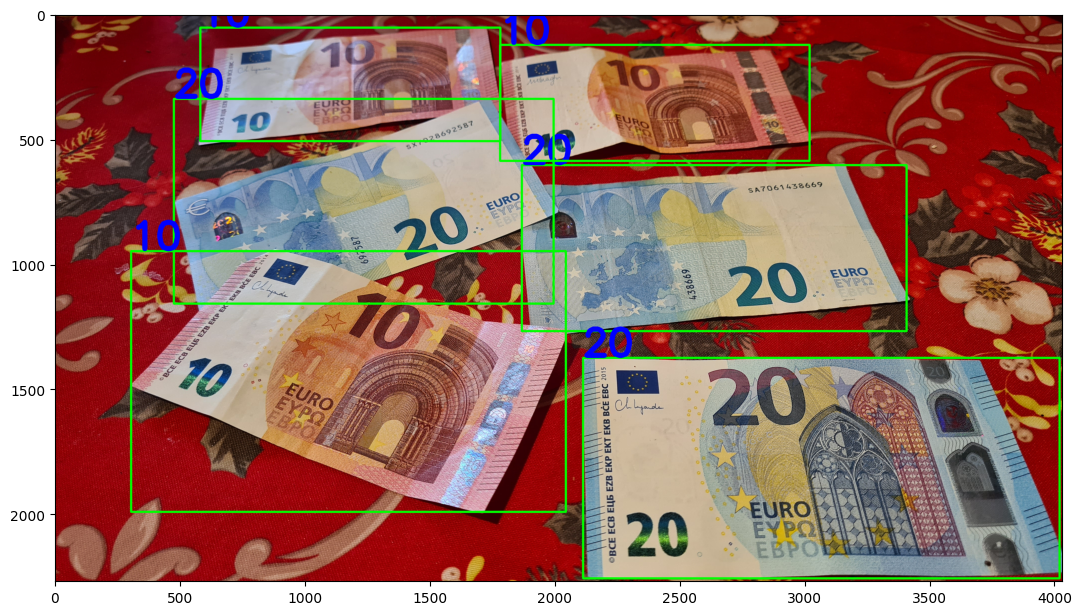

In [42]:
image = images[0]
labels_map = {0: '5', 1: '10', 2: '20', 3: '50', 4: '100', 5: '200'}
for detection in detection_results:
    h, w, _ = image.shape
    c, x_center, y_center, width, height = detection
    x_center, y_center, width, height = x_center * w, y_center * h, width * w, height * h
    x1, y1, x2, y2 = int(x_center - width / 2), int(y_center - height / 2), int(x_center + width / 2), int(y_center + height / 2)
    cropped_image = Image.fromarray(cv2.cvtColor(image[y1:y2, x1:x2], cv2.COLOR_BGR2RGB))
    #plt.figure()
    #plt.imshow(cropped_image)
    #plt.show()
    # Classify the cropped image
    predicted_class = classify_image(cropped_image)

    # Visualize the classification result
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 8)
    cv2.putText(image, labels_map[predicted_class], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 5, (255, 0, 0), 20)

    
plt.figure(figsize = (13, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
    

